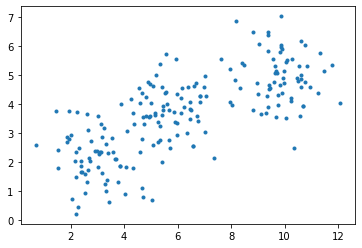

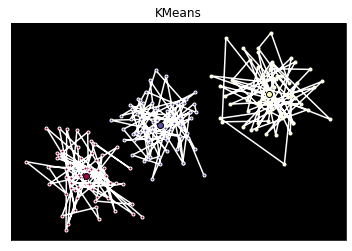

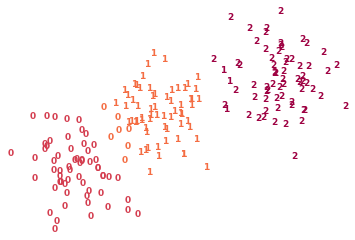

[[0.         0.68875871 0.29027041 ... 0.29329872 0.29428699 0.87806224]
 [0.68875871 0.         0.69237564 ... 0.39577438 0.68193381 0.25426008]
 [0.29027041 0.69237564 0.         ... 0.37736577 0.01220405 0.80511311]
 ...
 [0.29329872 0.39577438 0.37736577 ... 0.         0.3710466  0.59870543]
 [0.29428699 0.68193381 0.01220405 ... 0.3710466  0.         0.79324401]
 [0.87806224 0.25426008 0.80511311 ... 0.59870543 0.79324401 0.        ]]

[0.68875871 0.29027041 0.59728948 ... 0.3710466  0.59870543 0.79324401]


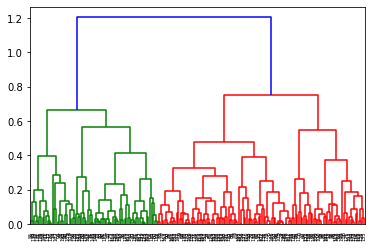

In [20]:
import numpy as np 
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

np.random.seed(0)

X, y = make_blobs(n_samples=200, centers=[[3,2], [6, 4], [10, 5]], cluster_std=0.9)
plt.scatter(X[:, 0], X[:, 1], marker='.')
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means.fit(X)
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_

# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot with a black background (background is black because we can see the points
# connection to the centroid.
ax = fig.add_subplot(1, 1, 1, facecolor = 'black')

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.

for k, col in zip(range(len([[3,2], [6, 4], [10, 5]])), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col. 'w'- white 
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    #'o' circle marker; 'k' - black 
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


agglom = AgglomerativeClustering(n_clusters = 3, linkage = 'average')
agglom.fit(X, y)
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X.
x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)

# Get the average distance for X.
X = (X - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
#added by Shang
cmap = plt.cm.get_cmap("Spectral")

for i in range(X.shape[0]): 
    plt.text(X[i, 0], X[i, 1], str(y[i]),
             color=cmap(agglom.labels_[i] / 10.), 
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
plt.axis('off')

# Display the plot
plt.show()

dist_matrix = distance_matrix(X,X) 
print(dist_matrix)
#condense the distance matrix using hierarchy.distance.pdisk 
#you should see the condensed distance matrix is a flat array. 
#It is the upper triangular of the distance matrix.
condensed_dist_matrix= hierarchy.distance.pdist(X,'euclidean')
print()
print(condensed_dist_matrix)

Z = hierarchy.linkage(condensed_dist_matrix, 'complete')
#Z = hierarchy.linkage(X, 'complete')
dendro = hierarchy.dendrogram(Z)